In [1]:
from google.colab.patches import cv2_imshow

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Boundary

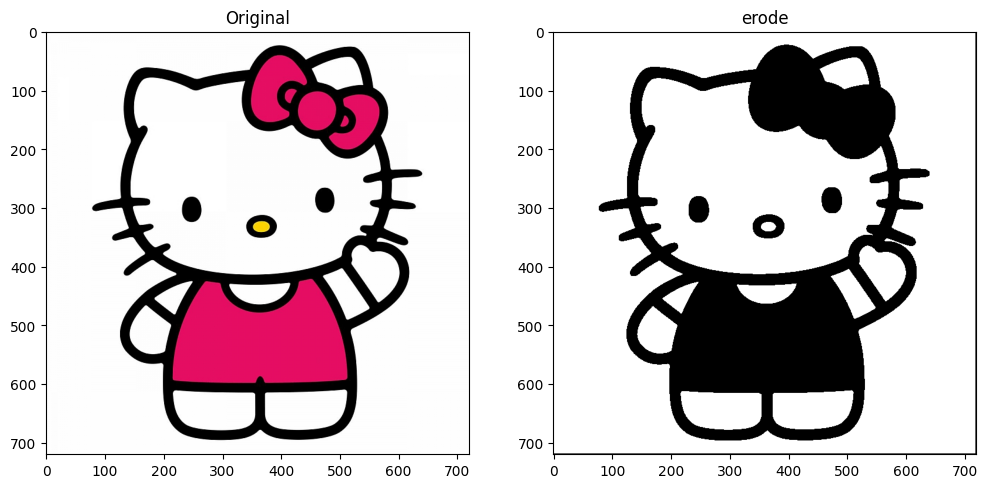

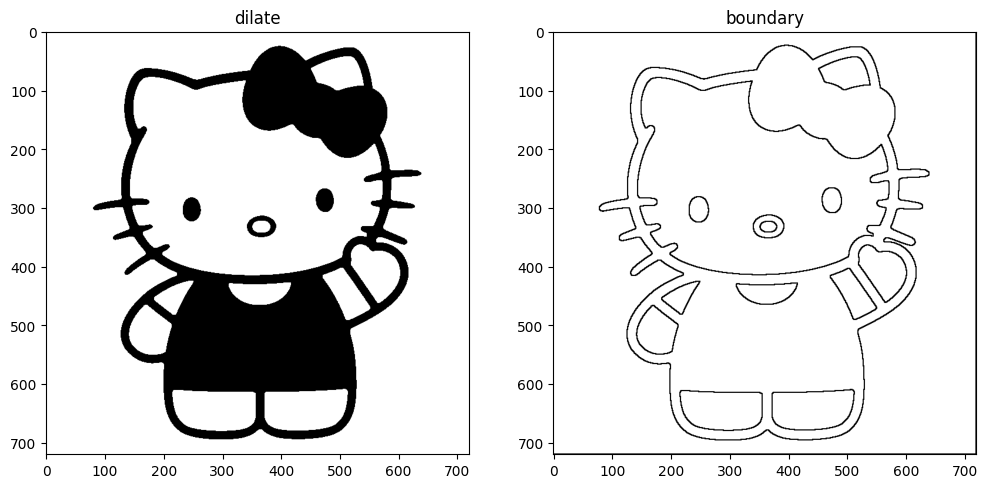

In [22]:
def threshold(img, thresh, maxval):
    if len(img.shape) > 2:
        raise ValueError("Input image should be grayscale")

    thresholded = np.zeros_like(img)
    thresholded[img > thresh] = maxval
    return thresholded

def getStructuringElement(shape, ksize):
    if shape == cv2.MORPH_RECT:
        return np.ones(ksize, dtype=np.uint8)
    elif shape == cv2.MORPH_CROSS:
        kernel = np.zeros(ksize, dtype=np.uint8)
        center = (ksize[0] // 2, ksize[1] // 2)
        kernel[center[0], :] = 1
        kernel[:, center[1]] = 1
        return kernel
    else:
        raise ValueError("Unsupported shape")

def erode(img, kernel):
    h, w = img.shape[:2]
    kh, kw = kernel.shape[:2]
    pad_h, pad_w = (kh - 1) // 2, (kw - 1) // 2
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    eroded_img = np.zeros_like(img)
    for i in range(h):
        for j in range(w):
            if np.all(padded_img[i:i+kh, j:j+kw] == img[i, j]):
                eroded_img[i, j] = img[i, j]
    return eroded_img

def dilate(img, kernel):
    h, w = img.shape[:2]
    kh, kw = kernel.shape[:2]
    pad_h, pad_w = (kh - 1) // 2, (kw - 1) // 2
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    dilated_img = np.zeros_like(img)
    for i in range(h):
        for j in range(w):
            if np.any(padded_img[i:i+kh, j:j+kw] & kernel):
                dilated_img[i, j] = 255
    return dilated_img


image = cv2.imread('IMG_1.jpg')
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# 二值化
img_binary = threshold(gray_img, 128, 255)
# 3*3 Structures Element
origin_el = getStructuringElement(cv2.MORPH_RECT,(3, 3))
# Erosion
erosion = erode(img_binary, origin_el)
# Dilation
dilation = dilate(img_binary, origin_el)
# Dilation - Erosion = boundary
boundary = dilation - erosion

# 二值圖畫素取反
result = 255 - boundary

plt.figure(figsize=(12, 9))
plt.subplot(1, 2, 1)
plt.imshow(image_RGB)
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(erosion, cmap='gray')
plt.title('erode')
plt.show()

plt.figure(figsize=(12, 9))
plt.subplot(1, 2, 1)
plt.imshow(dilation, cmap='gray')
plt.title('dilate')

plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('boundary')
plt.show()

# Regionfilling



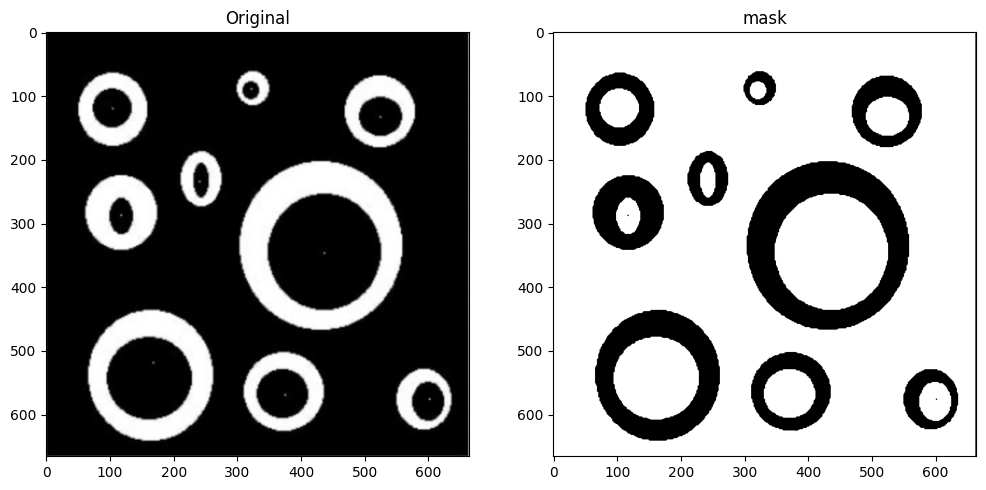

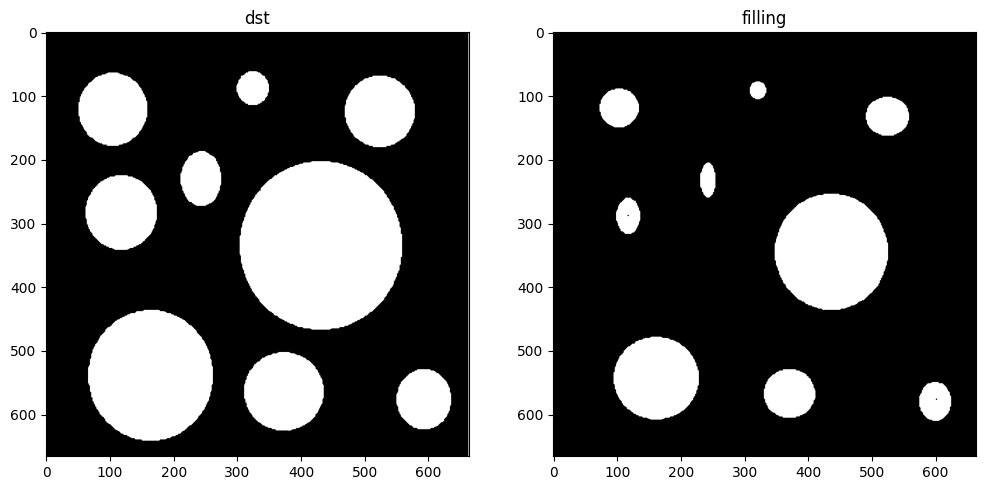

In [21]:
def dilate(img, kernel):
    h, w = img.shape[:2]
    kh, kw = kernel.shape[:2]
    pad_h, pad_w = (kh - 1) // 2, (kw - 1) // 2
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    dilated_img = np.zeros_like(img)
    for i in range(h):
        for j in range(w):
            if np.any(padded_img[i:i+kh, j:j+kw] & kernel):
                dilated_img[i, j] = 255
    return dilated_img

# 讀取圖像
image = cv2.imread('IMG_5.jpg')
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 二值化
img_binary = threshold(gray_img, 128, 255)

# 構造Marker圖像
marker = np.zeros_like(img_binary)
marker[0, :] = 255
marker[-1, :] = 255
marker[:, 0] = 255
marker[:, -1] = 255

# 原圖取補得到MASK圖像,限制膨脹結果
mask = 255 - img_binary
# cv2_imshow(mask)

# Region Filling,定義一個結構元素做膨脹,直到收斂為止
origin_el = getStructuringElement(cv2.MORPH_CROSS,(3, 3))

while True:
    marker_pre = marker.copy()
    dilation = dilate(marker, origin_el)
    marker = np.minimum(dilation, mask)  # dilation 跟 mask做比較，取最小值(0)，以達到filling的效果
    if np.array_equal(marker_pre, marker):
        break

dst = 255 - marker
filling = dst - img_binary

plt.figure(figsize=(12, 9))
plt.subplot(1, 2, 1)
plt.imshow(image_RGB)
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('mask')
plt.show()

plt.figure(figsize=(12, 9))
plt.subplot(1, 2, 1)
plt.imshow(dst, cmap='gray')
plt.title('dst')

plt.subplot(1, 2, 2)
plt.imshow(filling, cmap='gray')
plt.title('filling')
plt.show()

# Regionfilling using cv2.dilate

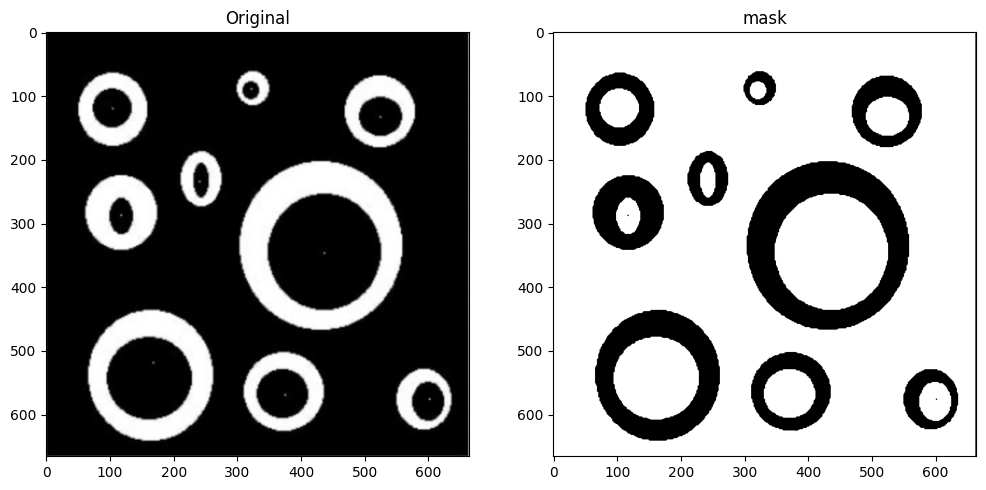

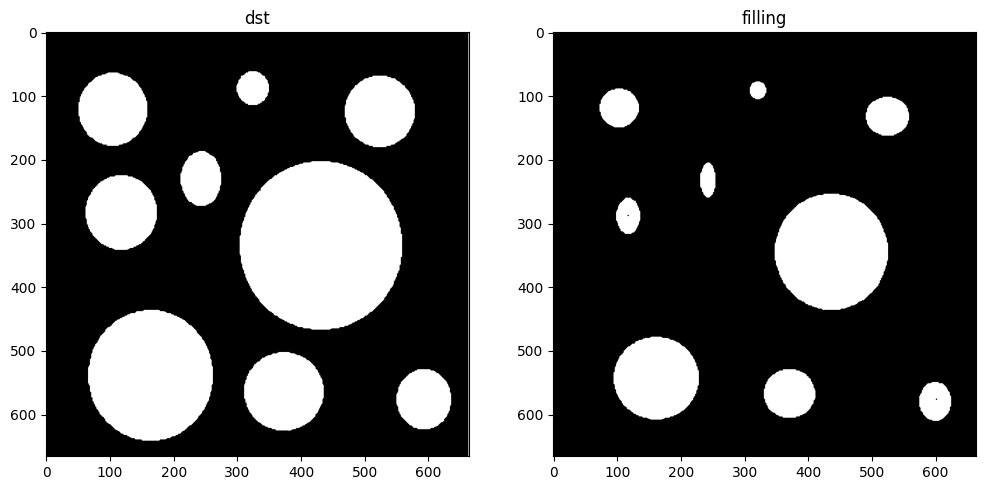

In [20]:
# 讀取圖像
image = cv2.imread('IMG_5.jpg')
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 二值化
img_binary = threshold(gray_img, 128, 255)

# 構造Marker圖像
marker = np.zeros_like(img_binary)
marker[0, :] = 255
marker[-1, :] = 255
marker[:, 0] = 255
marker[:, -1] = 255

# 原圖取補得到MASK圖像，限制膨脹結果
mask = 255 - img_binary

# Region Filling，定義一個結構元素做膨脹，直到收斂為止
origin_el = getStructuringElement(cv2.MORPH_CROSS,(3, 3))

while True:
    marker_pre = marker.copy()
    dilation = cv2.dilate(marker, origin_el)
    marker = np.minimum(dilation, mask)  # dilation 跟 mask做比較，取最小值(0)，以達到filling的效果
    if np.array_equal(marker_pre, marker):
        break

dst = 255 - marker
filling = dst - img_binary

# 顯示結果
plt.figure(figsize=(12, 9))
plt.subplot(1, 2, 1)
plt.imshow(image_RGB)
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('mask')
plt.show()

plt.figure(figsize=(12, 9))
plt.subplot(1, 2, 1)
plt.imshow(dst, cmap='gray')
plt.title('dst')

plt.subplot(1, 2, 2)
plt.imshow(filling, cmap='gray')
plt.title('filling')
plt.show()
